In [34]:
from itertools import combinations
import numpy as np
from scipy.special import binom
import matplotlib.pyplot as plt

In [22]:
lam = 180
mis = [1 / 0.001, 1 / 0.0005]
ros = [lam / i for i in mis] 
ros

[0.18, 0.09]

In [23]:
def calculate_sk(k, ros):
    SK = set(combinations(ros, k))
    products = []
    for i in SK:
        result = 1
        for j in i:
            result *= j
        products.append(result)
    products = np.array(products)
    return np.sum(products)
    

In [24]:
def calculate_pi0(m, ros):
    ks = range(0, m)
    results = [calculate_sk(i, ros) / (np.math.factorial(i) * binom(m, i)) for i in ks]
    last = (calculate_sk(m,ros) * calculate_sk(m-1,ros)) / (np.math.factorial(m) * (calculate_sk(m-1, ros) - calculate_sk(m,ros)))
    return 1 / (1 + np.sum(results) + last)

In [25]:
pizero = calculate_pi0(len(ros), ros)
pizero

0.46650124069478915

In [26]:
def calculate_pk(k, m, ros):
    if k in range(0, m):
        return calculate_pi0(m, ros) * (calculate_sk(k, ros)) / (np.math.factorial(k) * np.power(binom(m,k), k - m))
    else:
        return calculate_pi0(m, ros) * (calculate_sk(k, ros)) / (np.math.factorial(k) * np.power(calculateSK(m-1, ros), k - m))

In [27]:
calculate_pk(0, len(ros), ros)

0.46650124069478915

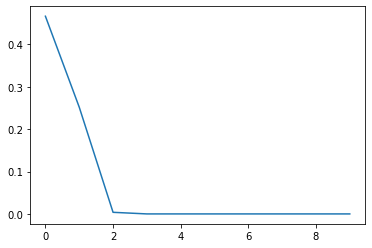

In [28]:
ks = range(0, 10)
probabs = [calculate_pk(k, len(ros), ros) for k in ks]
plt.plot(ks, probabs)

In [38]:
def calculate_avg_queue_size(m, ros):
    return (calculate_sk(m -1, ros)) / (np.math.factorial(m) * np.power((calculate_sk(m-1, ros) / calculate_sk(m, ros) - 1), 2) * calculate_pi0(m, ros))

In [39]:
def calculate_avg_occupied(m, ros):
    return m * calulcate_sk(m, ros) / calcualte_sk(m-1, ros)

In [40]:
def calculate_avg_system_notifiactions(m, ros):
    return calculate_avg_queue_size(m, ros) + calculate_avg_occupied(m, ros)

In [43]:
calculate_avg_system_notifiactions(len(ros), ros)

NameError: name 'calulcate_sk' is not defined